In [142]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [152]:
from analysis_routines import * 
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [7]:
temp, pres, date = load_time_series('unprocessed/AGL_20200531_chain.nc')

In [24]:
print(np.max(temp))

24.1134


In [10]:
df_s = load_SHDR_fit('free_a2/AGL_20200531_fit_fs.csv')
df_c = load_SHDR_fit('free_a2/AGL_20200531_fit_fc.csv')
df_ci = load_SHDR_fit('free_a2/AGL_20200531_fit_fci.csv')

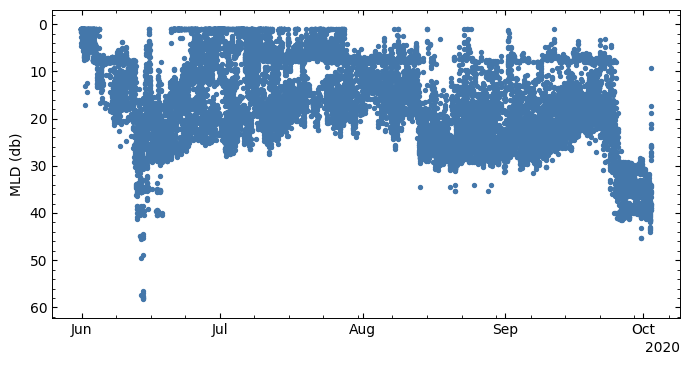

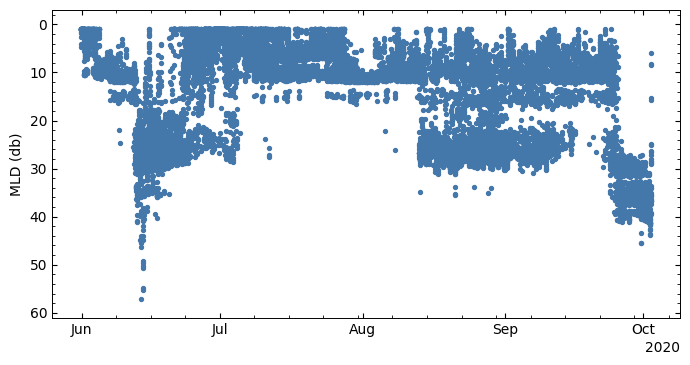

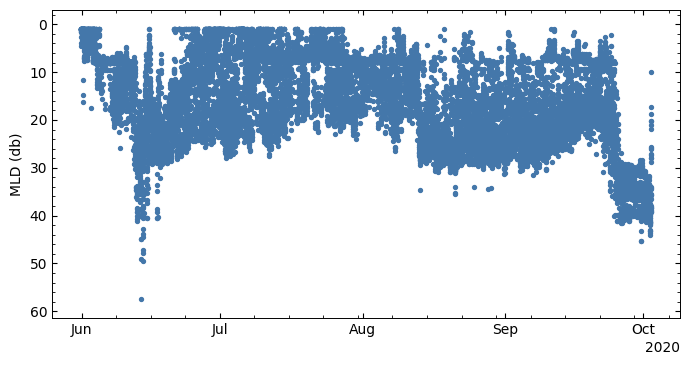

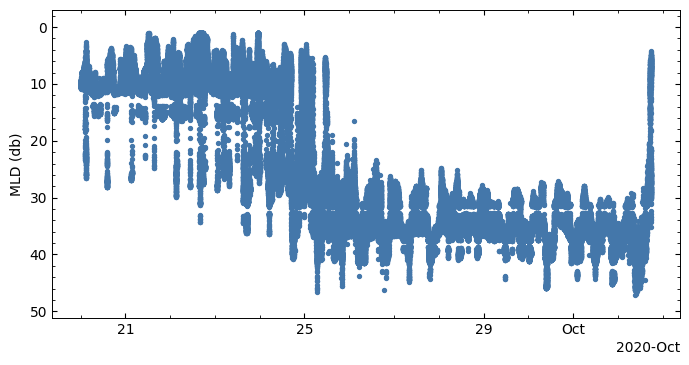

In [77]:
interval = timedelta(minutes=10)
plot_fit_variable(df_s, 'D1', interval=timedelta(minutes=10))
plot_fit_variable(df_ci, 'D1', interval=interval)
plot_fit_variable(df_c, 'D1', interval=interval)
plot_fit_variable(df_ci, 'D1', lims=[datetime(2020, 9, 20), -1])

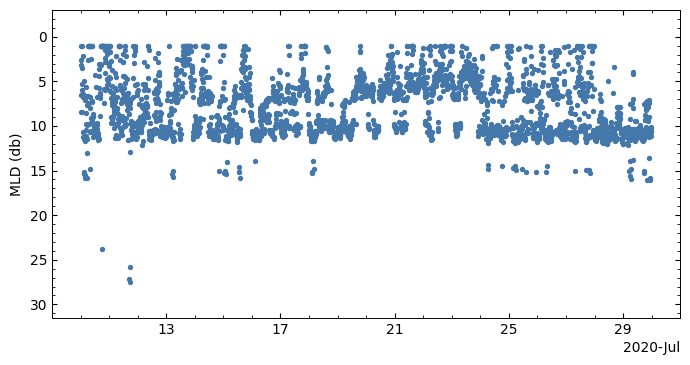

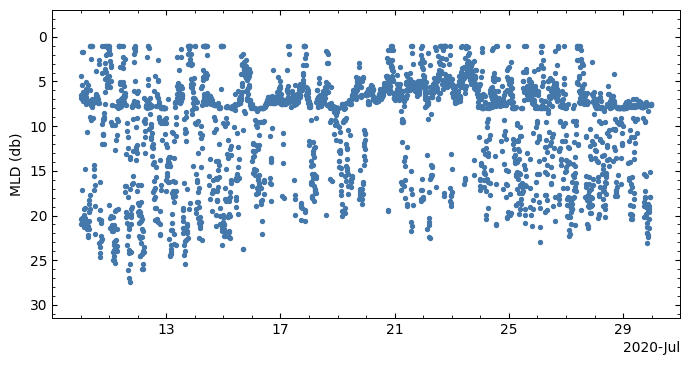

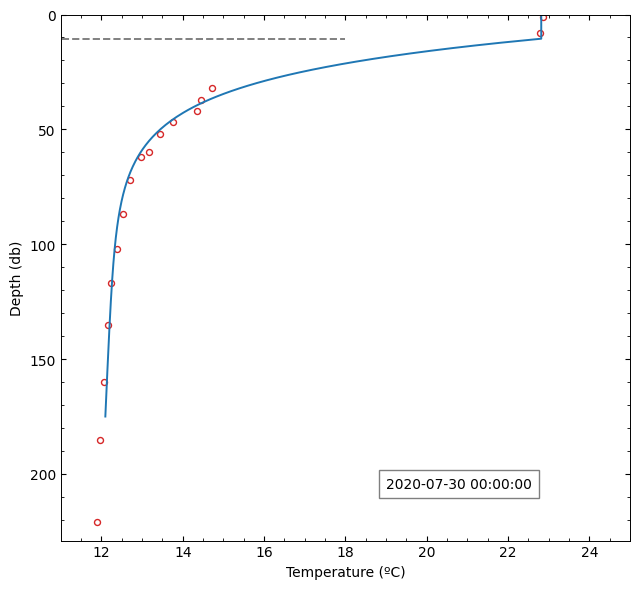

In [234]:
date_0 = datetime(2020, 7, 10)
date_1 = datetime(2020, 7, 30)
plot_fit_variable(df_ci, 'D1', lims=[date_0, date_1], interval=interval)
plot_fit_variable(df_c, 'D1', lims=[date_0, date_1], interval=interval)
animate_profile_evolution(df_ci, temp, pres, 'summer_2020.mp4', start_loc=date_0, final_loc=date_1)

In [57]:
locs = np.where(df_s['D1'] - df_ci['D1'] >= 10)[0]

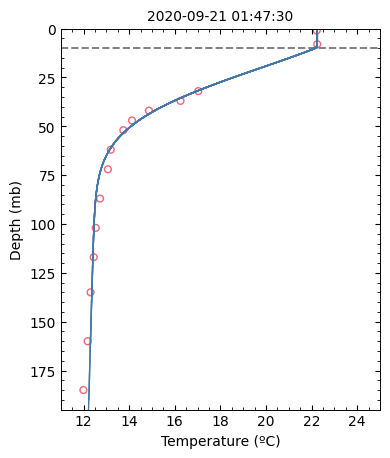

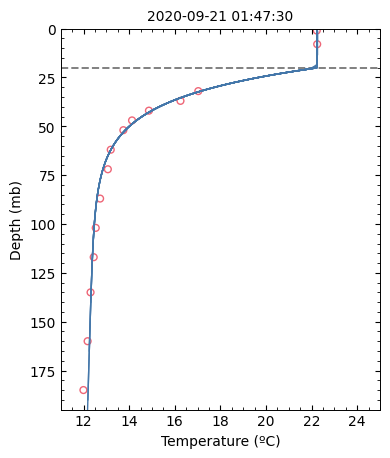

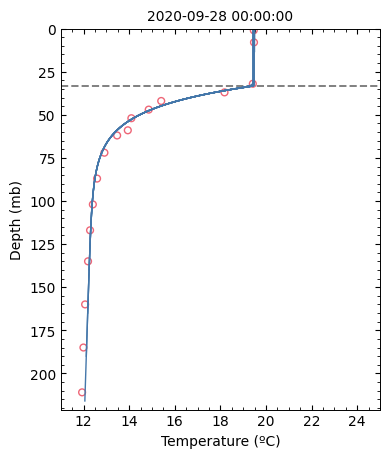

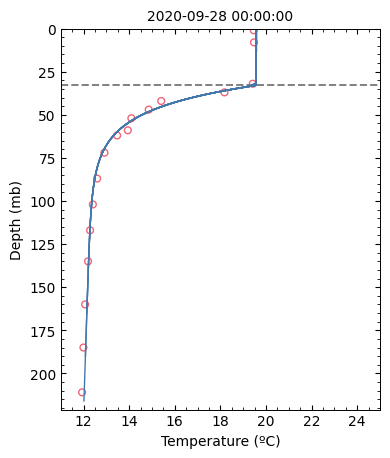

In [102]:
i = np.random.choice(locs)
plot_profile_fit(df_ci, temp, pres, i)
datetime(2020, 9, 21, 1, 47, 30)
plot_profile_fit(df_s, temp, pres, i)
plot_profile_fit(df_s, temp, pres, datetime(2020, 9, 28))
plot_profile_fit(df_ci, temp, pres, datetime(2020, 9, 28))

In [223]:
def compare_standard_vs_ci(df_s, df_ci, temp, depth, loc, save=False):
    
    if isinstance(loc, datetime):
        loc = date_to_idx(df['date'], loc)


    temp_loc = if_masked_to_array(temp[loc])
    pres_loc = if_masked_to_array(depth[loc])
    
    zz = np.linspace(1, pres_loc[-1] + 5, 500)

    fig, ax = plt.subplots(figsize=(4, 4.6875))
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    ax.scatter(temp_loc, pres_loc, marker='o', fc='None', ec=colors[1], s=24)
    ax.axhline(df_s.iloc[loc, 3], c='grey', ls='--', label='MLD s') # plot MLD
    ax.axhline(df_ci.iloc[loc, 3], c='grey', ls=':', label='MLD c+i') # plot MLD
    ax.set_ylim(pres_loc[-1] + 10, 0)
    if depth.shape[1] == 17:
        ax.set_xlim(11, 25)
    else:
        ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_s, loc), zz, lw=1, c=colors[0], label='standard')
    ax.plot(fit_function(zz, df_ci, loc), zz, lw=1, c=colors[4], label='continous + interpolation')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_s['date'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    if save is not False:
        fig.savefig(str(save))
    plt.show()

1606748


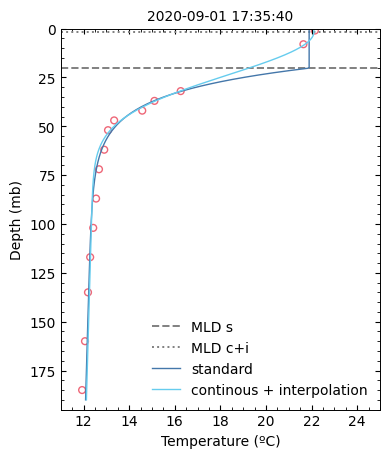

In [216]:
i = np.random.choice(locs)
i = np.random.choice(len(date) - 1)
print(i)
compare_standard_vs_ci(df_s, df_ci, temp, pres, i)

In [218]:
a = [450068, 575061, 995941, 1789037,410746, 2085261, 1606748]

In [ ]:
idx = date_to_idx(date, datetime(2020, 9, 21, 1, 47, 30))

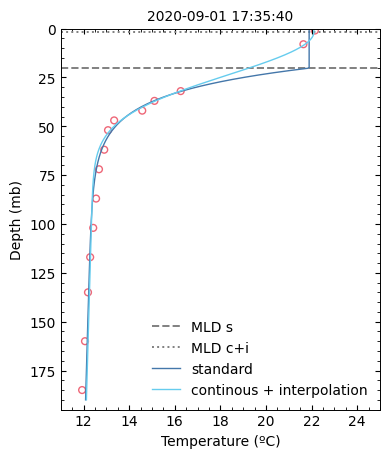

In [235]:
compare_standard_vs_ci(df_s, df_ci, temp, pres, i, save=i)

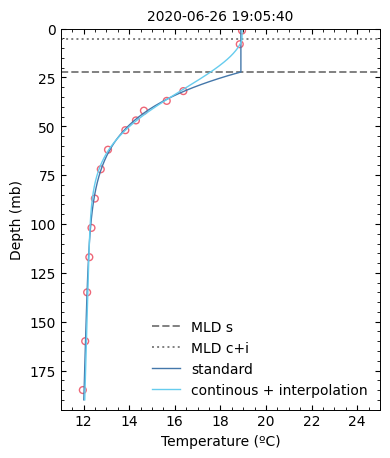

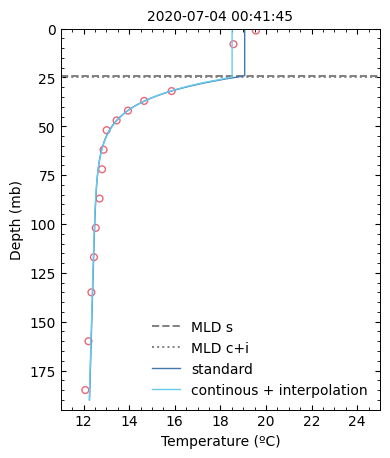

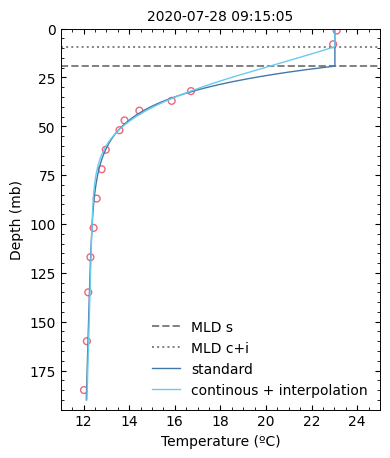

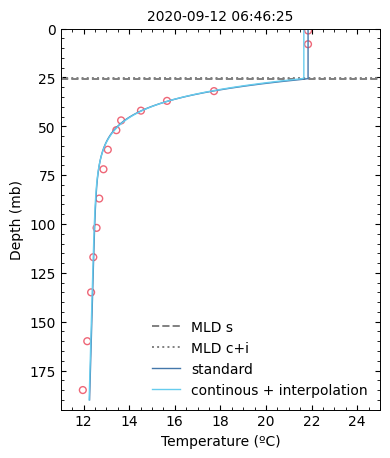

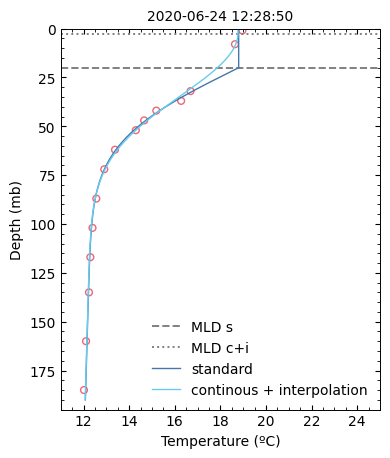

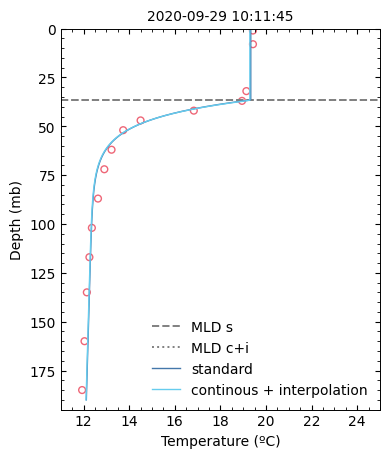

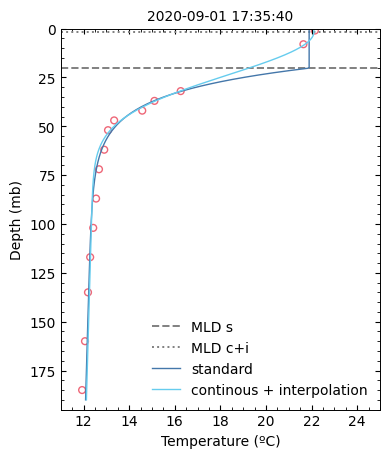

In [224]:

for i in a:
    compare_standard_vs_ci(df_s, df_ci, temp, pres, i, save=i)

In [225]:
print(pres[0])

[1 8 32 37 42 47 52 60 62 72 87 102 117 135 160 185 223]
